# Import libraries

In [11]:
import pandas as pd 
from spacy.lang.fr.stop_words import STOP_WORDS
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()
from plotly import express as px 
from plotly import graph_objects as go
import json
from PIL import Image
import numpy as np

# Import messages

In [12]:
#uncomment below and execute this if you haven't done it yet
#!python scrape_SpeeDons_messages.py 

In [13]:
with open("../data/SpeeDons_chat.json", "r") as file:
    data = json.load(file)

In [14]:
messages = pd.DataFrame.from_dict(data)

# Feature engineering

In [15]:
def is_subscriber(author):
    try:
        return author["badges"][0]["name"] == "subscriber"
    except KeyError:
        return False

In [16]:
messages["author_name"] = [author["display_name"] for author in messages["author"]]
messages["MV_subscriber"] = [is_subscriber(author) for author in messages["author"]]
messages["date"] = pd.to_datetime(messages["timestamp"], unit="us", utc=True)
messages["message_day"] = [date.day_name() for date in messages["date"]]

In [17]:
messages

,author,emotes,message,message_id,message_type,source,state,time_in_seconds,time_text,timestamp,author_name,MV_subscriber,date,message_day
0,"{'badges': [{'click_action': 'turbo', 'click_u...","[{'id': '34', 'images': [{'height': 28, 'id': ...",SwiftRage,6b32e8ac-0d8d-4fa4-91ea-9f7441db7d04,text_message,chat,published,5.866,0:05,1650028650566000,Wadjaah,False,2022-04-15 13:17:30.566000+00:00,Friday
1,"{'bio': 'Je suis une très jolie fleur. ', 'col...",[{'id': 'emotesv2_5314a90cc7be4059a9e9efdd345d...,ponceOVERTOAD ponceOVERTOAD ponceOVERTOAD ponc...,3111b8fa-e6bd-4b56-b35b-e63af6ed6daa,text_message,chat,published,7.501,0:07,1650028652201000,Kyra_poil,False,2022-04-15 13:17:32.201000+00:00,Friday
2,{'badges': [{'click_action': 'subscribe_to_cha...,NaN,Here we go POGGERS,b019aabe-580a-4136-8ea9-fdf350aee5f2,text_message,chat,published,9.390,0:09,1650028654090000,Memuvd,True,2022-04-15 13:17:34.090000+00:00,Friday
3,"{'badges': [{'click_action': 'visit_url', 'cli...",[{'id': 'emotesv2_8098e37bc383472aa5efbc824bc2...,zrtDance,bc657b5d-8c71-4545-92f0-e79a1a3c14c7,text_message,chat,published,9.557,0:09,1650028654257000,Rex_wafwaf,False,2022-04-15 13:17:34.257000+00:00,Friday
4,"{'badges': [{'click_action': 'visit_url', 'cli...",NaN,PepoDance PepoDance PepoDance PepoDance PepoDa...,c34ddf82-0a7b-4cbb-82d1-f2e009847520,text_message,chat,published,11.461,0:11,1650028656161000,Licasoras,False,2022-04-15 13:17:36.161000+00:00,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280811,"{'badges': [{'click_action': 'visit_url', 'cli...",NaN,la prochaine fois y'aura elden ring !,f9a01411-c67f-4353-a909-869d210d120d,text_message,chat,published,54491.072,15:08:11,1650228395772000,LeNuageux,False,2022-04-17 20:46:35.772000+00:00,Sunday
280812,"{'badges': [{'click_action': 'none', 'click_ur...",NaN,@LeNuageux Elden Ring n'était pas sorti lors d...,e9c9a209-3f73-4b09-981e-c71e1b6d7dac,text_message,chat,published,54491.420,15:08:11,1650228396120000,Robochiotte,False,2022-04-17 20:46:36.120000+00:00,Sunday
280813,"{'badges': [{'click_action': 'visit_url', 'cli...",NaN,Bonne nuit à tous !,1d246482-f592-46e9-ad77-5a1ed27d5b7b,text_message,chat,published,54492.236,15:08:12,1650228396936000,Zamness,False,2022-04-17 20:46:36.936000+00:00,Sunday
280814,{'bio': 'chalut a tous et bienvenus! j'étais à...,NaN,et merde,4e961735-d7c8-43dd-b302-80989ca7225e,text_message,chat,published,54492.784,15:08:12,1650228397484000,jj12catien,False,2022-04-17 20:46:37.484000+00:00,Sunday


# Analyse des données

Nombre de total de messages

In [18]:
print(f"Le nombre total de messages postés lors de SpeeDons 2022 est de {len(messages)} !")

Le nombre total de messages postés lors de SpeeDons 2022 est de 280816 !


Nombre de messages par jour

In [48]:
messages_per_day = pd.DataFrame(messages.groupby("message_day").count()["message"])

fig_1 = px.bar(data_frame=messages_per_day, y="message", color=messages_per_day.index, text=[f'{i:.2f}%' for i in messages_per_day['message'] * 100 / messages_per_day["message"].sum()])
fig_1.update_layout(title={
        'text': f"Nombre de messages par jour lors de SpeeDons 2022",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig_1.update_xaxes(title="Jour")
fig_1.update_yaxes(title="Nombre de messages")

Top N des meilleurs posteurs

In [20]:
N = 5
n_best_viewers = messages.groupby("author_name")["message"].count().sort_values(ascending=False)[:N]
n_best_viewers = pd.DataFrame(n_best_viewers, index=n_best_viewers.index);n_best_viewers

,message
author_name,
J0selitoo,1596
KBlastR,1276
YohanLeHeroo,1155
CoLLiNeClegane,1036
ForbiddenPit,947


In [50]:
fig_2 = px.bar(data_frame=n_best_viewers, y="message", color=n_best_viewers.index, text=[f'{i}' for i in n_best_viewers['message']])
fig_2.update_layout(title={
        'text': f"Top {N} des plus gros posteurs lors de SpeeDons 2022",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig_2.update_xaxes(title="Auteur")
fig_2.update_yaxes(title="Nombre de messages")

Messages des gros streamers

In [22]:
def get_user_messages(author):
    return messages[messages["author_name"] == author]["message"]

In [23]:
big_streamers = ["mistermv", "ZeratoR", "DamDamLive"]

for streamer in big_streamers:
    print(f"{streamer} messages :")
    for message in get_user_messages(streamer):
        print(message)
    print("\n")

mistermv messages :
MOAR COWBELL
Bon j'ai publié la VOD mais elle fait 32h donc ça va prendre quelques minutes lol


ZeratoR messages :
JDF en effet @kwev
17006/20000
17285/20000
17737/20000 !!!
monkaS
monkaS monkaS monkaS
🥵
monkaS
zrtPetthezerator
monkaS
monkaS
Ho putain
monkaS monkaS monkaS
Regarde pas derrière toi monkaS
monkaS
monkaS je suis en détente monkaS
monkaS
zrtNotLikeThis
monkaS
monkaS hoooo
monkaS
Ça va
Encore le lobby des douches pour nous les gamers…..
Attendez mais la run va durer 5h là ?
Attendez mais la run dure 5h?
Je ne suis pas ZeratoR je suis le bot qui le remplace car il dort (non)
@yamato une belle nuit à vous
Attendez mais la run dure 5h là ?
ééééééééééééééééya
le runner joue vraiment bien, il s'appelle TAS c'est ça ?
non seulement le runner TAS est très fort, mais c'est pas la première fois que je le vois faire du speedrun, il doit vraiment avoir du temps à perdre
je connais TAS en vrai il est assez prétentieux, toujours à dire "je suis le meilleur, vous ne p

Proportion de viewers qui ont posté non abonnés à MV

In [24]:
nb_mv_subscriber = len(messages[messages["MV_subscriber"]])

print("La proportion de viewers ayant posté non abonnés à MV lors de SpeeDons 2022 a été de {:.2f}% !".format(100 - nb_mv_subscriber *100 / len(messages)))

La proportion de viewers ayant posté non abonnés à MV lors de SpeeDons 2022 a été de 85.17% !


Distribution de la longeur des messages

/home/cmnemoi/miniconda3/envs/SpeeDonsChatAnalysis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

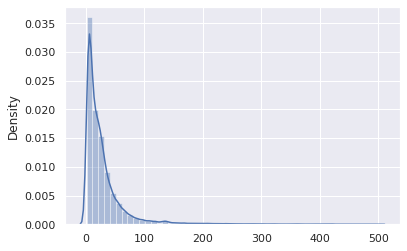

In [25]:
messages_length = pd.Series([len(message) for message in messages["message"]]);messages_length

sns.distplot(x=messages_length)

In [26]:
print('Le message le plus court a été un sobre "{}" au mileu d\'un spam d\'emotes. Voilà, merci {} pour cette éloquence sans nom'.format(messages.loc[messages_length.argmin(),"message"], messages.loc[messages_length.argmin(),"author_name"]))

Le message le plus court a été un sobre "J" au mileu d'un spam d'emotes. Voilà, merci kekegolden pour cette éloquence sans nom


In [27]:
index_longuest_message = messages_length.argmax()
print('Le message le plus long a été "{}".\nMerci {} pour ton enthousiasme!'.format(messages.loc[index_longuest_message,"message"], messages.loc[index_longuest_message,"author_name"]))

Le message le plus long a été "ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSauron ponceOVERTOAD zrtSau".
Merci Mousttachou pour ton enthousiasme!


In [28]:
temp = list(STOP_WORDS)
STOP_WORDS = [word.upper() for word in temp]

In [29]:
list_messages = [message for message in messages["message"]]
words = pd.Series([word.split(' ') for word in list_messages])
words = words.explode().reset_index(drop=True)
words = pd.Series([word.upper() for word in words]).value_counts()
words = words.drop(STOP_WORDS, errors='ignore')

In [30]:
words

PEPOG        45964
CLAP         32575
CATJAM       21292
<3           19730
GG           18170
             ...  
DARONNES         1
ENFOIROS         1
130K!!!          1
SACRILÈGE        1
SILENCE.         1
Length: 67206, dtype: int64

In [31]:
words_frequency = words / words.sum()
words_frequency.drop("", inplace=True)
words_frequency

PEPOG        0.046002
CLAP         0.032602
CATJAM       0.021309
<3           0.019746
GG           0.018185
               ...   
DARONNES     0.000001
ENFOIROS     0.000001
130K!!!      0.000001
SACRILÈGE    0.000001
SILENCE.     0.000001
Length: 67205, dtype: float64

In [32]:
def generate_wordcloud(data, title, mask=None, colored=False):
        cloud = WordCloud(scale=3,
                        mask=mask,
                        background_color='white', random_state=0).generate_from_frequencies(data)
        
        plt.figure(figsize=(10,8))
        if colored:
            plt.imshow(cloud.recolor(color_func=ImageColorGenerator(mask)))
        else:
            plt.imshow(cloud)
        plt.axis('off')
        plt.title(title, fontsize=30)
        plt.show()

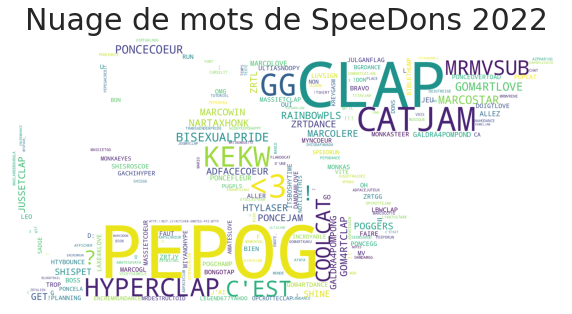

In [33]:
speedons_logo = np.array(Image.open('../data/speedons_logo.png'))

generate_wordcloud(words_frequency, "Nuage de mots de SpeeDons 2022", mask=speedons_logo)

Time series du nombre de messages

In [34]:
time_series_df = messages[["date", "message"]]
time_series_df.index = time_series_df["date"]
time_series_df

,date,message
date,,
2022-04-15 13:17:30.566000+00:00,2022-04-15 13:17:30.566000+00:00,SwiftRage
2022-04-15 13:17:32.201000+00:00,2022-04-15 13:17:32.201000+00:00,ponceOVERTOAD ponceOVERTOAD ponceOVERTOAD ponc...
2022-04-15 13:17:34.090000+00:00,2022-04-15 13:17:34.090000+00:00,Here we go POGGERS
2022-04-15 13:17:34.257000+00:00,2022-04-15 13:17:34.257000+00:00,zrtDance
2022-04-15 13:17:36.161000+00:00,2022-04-15 13:17:36.161000+00:00,PepoDance PepoDance PepoDance PepoDance PepoDa...
...,...,...
2022-04-17 20:46:35.772000+00:00,2022-04-17 20:46:35.772000+00:00,la prochaine fois y'aura elden ring !
2022-04-17 20:46:36.120000+00:00,2022-04-17 20:46:36.120000+00:00,@LeNuageux Elden Ring n'était pas sorti lors d...
2022-04-17 20:46:36.936000+00:00,2022-04-17 20:46:36.936000+00:00,Bonne nuit à tous !


In [35]:
time_series_df["new_date"] = time_series_df["date"].dt.floor('10T') #slicing date per 10 minutes intervals

/tmp/ipykernel_2317/1353942380.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
nb_messages_per_10_minutes = time_series_df.groupby("new_date").count()[["message"]]

In [40]:
nb_messages_per_10_minutes = nb_messages_per_10_minutes.tz_convert("Europe/Paris") #convert dates to CET

In [60]:
nb_messages_per_10_minutes

,message
new_date,
2022-04-15 15:10:00+02:00,90
2022-04-15 15:20:00+02:00,354
2022-04-15 15:30:00+02:00,464
2022-04-15 15:40:00+02:00,1470
2022-04-15 15:50:00+02:00,1021
...,...
2022-04-17 22:00:00+02:00,2760
2022-04-17 22:10:00+02:00,3771
2022-04-17 22:20:00+02:00,4379


In [94]:
fig_3 = go.Figure()

fig_3.add_trace(go.Scatter(x=nb_messages_per_10_minutes.index, y=nb_messages_per_10_minutes["message"]))
fig_3.update_layout(title={
        'text': f"Nombre de messages durant SpeeDons 2022",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig_3.update_xaxes(title="Date")
fig_3.update_yaxes(title="Nombre de messages")

#add games from https://tracker.speedons.fr/campaigns/c9071ne1km7b1a0app50/schedule
fig_3.add_annotation(x="2022-04-16 14:10:00+02:00", y=2500,
            text="Super Mario Sunshine",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-15 22:20:00+02:00", y=1400,
            text="Rayman Origins",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-16 20:24:00+02:00", y=2000,
            text="Metroid Dread",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-16 22:10:00+02:00", y=1400,
            text="DARK SOULS III",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-17 12:19:00+02:00", y=1400,
            text="Metroid Prime",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-17 15:14:00+02:00", y=1600,
            text="Celeste",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-17 17:30:00+02:00", y=3100,
            text="Super Mario 64",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-17 20:34:00+02:00", y=2700,
            text="Zelda Ocarina of Time",
            showarrow=True,
            arrowhead=1)
fig_3.add_annotation(x="2022-04-17 22:00:00+02:00", y=2900,
            text="Hollow Knight",
            showarrow=True,
            arrowhead=1)
